# Vyrovnání histogramu

### 0) Import knihoven

Nejprve je potřeba si naimportovat knihovny, které pro práci s obrázky budeme potřebovat.

In [1]:
import cv2 as cv # knihovna pro práci s obrázky
import numpy as np # obsahuje základní i pokročilé matematické funkce
from matplotlib import pyplot as plt # tato knihovna slouží ke kreslení grafů (a v našem případě i obrázků)

### 1) Definice funkcí

Funkce pro provedení konvoluce se zadanou maskou. Vstupy jsou obrázek a maska. Výstup je obrázek po konvoluci.

In [2]:
def convolution(image, mask):
    
    conv = np.zeros((len(image),len(image[0])))
    l = int(len(mask)/2)

    
    for i in range(l ,len(image)-l):
            for j in range(l,len(image[0])-l):
                    if sum(sum(mask))!=0:
                        conv[i,j] = int(sum(sum(image[(i-l):(i+l+1),(j-l):(j+l+1)]*mask)))
                    else:
                        conv[i,j] = int(sum(sum(image[(i-l):(i+l+1),(j-l):(j+l+1)]*mask)))

    return conv

### 2) Tělo programu

Tady pomocí výše definované funkce můžeme provádět konvoluci s různými maskami.
#### 2.1) Načtení obrázku
Nejprve si načteme obrázek ze souboru pomocí funkce 'imread' z knihovny 'cv2'.

In [3]:
lena = cv.imread("lena3imp.jpg", 0) # vhodné pro masky odstraňující šum
bricks = cv.imread("bricks.jpg", 0) # vhodné pro zvýraznění hran

#### 2.2) Definice různých masek

In [4]:
average = np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1]])
gauss_large = np.array([[1, 4, 7, 4, 1],[4, 16, 26, 16, 4],[7, 26, 41, 26, 7],[4, 16, 26, 16, 4],[1, 4, 7, 4, 1]])
gauss = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]])
laplace = np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]])
edges = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])
vertical_edges = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
horizontal_edges = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

Zvolíme si, který obrázek a kterou masku chceme použít:

In [5]:
img = lena
mask = gauss_large

Nyní můžeme spočítat jejich konvoluci:

In [6]:
img_conv = convolution(img.copy(),mask)

#### 2.3) Vykreslení obrázků

Vykreslíme původní obrázek a obrázek po konvoluci s vybranou maskou:

[]

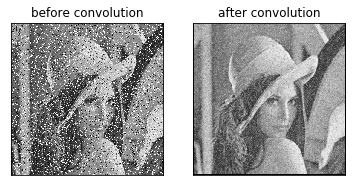

In [7]:
ifig, iaxs = plt.subplots(ncols=2)

# nejdříve zakreslíme původní obrázek
iaxs[0].set_title('before convolution')
# imshow() standardne histogram narovnava, takze se to tu musi vypnout pomocí  'NoNorm()' :-)
iaxs[0].imshow(img,cmap='gray')
iaxs[0].set_xticks([]) # vykreslujeme obrázek, popisky os nepotřebujeme
iaxs[0].set_yticks([]) # vykreslujeme obrázek, popisky os nepotřebujeme

# pak zakreslíme vyrovnaný obrázek
iaxs[1].set_title('after convolution')
# tady teoreticky ne, ale budeme konzistentni ;-)
iaxs[1].imshow(img_conv,cmap='gray')
iaxs[1].set_xticks([]) # vykreslujeme obrázek, popisky os nepotřebujeme
iaxs[1].set_yticks([]) # vykreslujeme obrázek, popisky os nepotřebujeme